# Data Exploration




    In this notebook we will explore the customer segmentation dataset for this Kaggle project. Our goal is to     understand the features and their relationships with the target variable which is 'Segmentation'. We will start by loading and inspecting the data, performing the regular checks, and visualizing the distributions of the features. Then, we will perform some exploratory data analysis to gain insights of the correlations between the features and the target variable. This part may include handling missing values. Finally, we will summarize our findings and identify any interesting patterns or trends in the data that could inform our modeling approach. 
    
    The dataset (train) consists of 8068 instances and 11 columns that are mapped below, whereas the test set consists of 2627 instances and 10 columns (excluding 'Segmenetation').


### In this notebook, you may find:
* Exploration on missing values 
* Distributions of variables
* Relationships between variables (Q-Q/C-Q)

   ## Columns mapping

           
| Variable	            | Definition                                                        |
|---------------------- |-------------------------------------------------------------------|
| ID	                | Unique ID                                                         |
| Gender	            | Gender of the customer                                            |
| Ever_Married	        | Marital status of the customer                                    |
| Age	                | Age of the customer                                               |
| Graduated	            | Is the customer a graduate?                                       |
| Profession	        | Profession of the customer                                        |
| Work_Experience	    | Work Experience in years                                          |
| Spending_Score	    | Spending score of the customer                                    |
| Family_Size	        | Number of family members for the customer(including the customer) |
| Var_1	                | Anonymised Category for the customer                              |
| Segmentation(target)  | Customer Segment of the customer                                  |

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [31]:
def plot_histogram_grouped(df_train, col, hue):
    """
    Function to plot a histogram for a numerical variable.
    Args:
        df_train : pandas DataFrame, the input dataset to be plotted
        col : str, the column name of the numerical variable to be plotted
        hue : str, optional (default=None),the column name of the segment variable to group by. If None, plot a histogram for the entire dataset.
    Returns: -
    """
    sns.histplot(data=df_train, x=col, hue=hue, multiple='stack', kde=True)
    plt.title(f'Histogram of {col} by {hue}')
    plt.show()

def plot_barplot_grouped(df_train, col, hue):
    """
    Plots a bar plot of a categorical variable by a categorical variable.
    Args:
        df_train: pandas DataFrame, DataFrame containing the data to be plotted.
        col: str, the name of the column representing the categorical variable to be plotted on the x-axis.
        hue: str, the name of the column representing the categorical variable to be plotted by color.
    Returns: -
    """
    sns.countplot(data=df_train, x=col, hue=hue)
    plt.title(f'Bar Plot of {col} by {hue}')
    plt.show()

def plot_boxplot_grouped(df_train, col, hue):
    """
    Function to plot a box plot for a numerical variable grouped by a segment variable.
    Args:
        df_train : pandas DataFrame, the input dataset to be plotted 
        col : str, the column name of the numerical variable to be plotted 
        hue : str, the column name of the segment variable to group by  
    Returns: -
    """
    sns.boxplot(data=df_train, x=hue, y=col, hue=hue)
    plt.title(f'Box Plot of {col} by {hue}')

    # Calculate the mean
    means = df_train.groupby(hue)[col].mean()

    for i, segment in enumerate(df_train[hue].unique()):
        mean = means[segment]
        plt.text(i, mean, f'{mean:.2f}', ha='center', va='bottom', color='blue', fontweight='bold')

    plt.show()

def plot_piechart_grouped(df_train, col, hue):
    """
    This function to plot a pie chart for a categorical variable
    grouped by a segment variable
    Args: 
        df_train : pandas DataFrame, The input dataset to be plotted  
        col : str, The column name of the categorical variable to be plotted 
        hue : str, The column name of the segment variable to group by
    Returns: -
    """
    plt.figure(figsize=(10, 8))
    for i, segment in enumerate(df_train[hue].unique()):
        plt.subplot(2, 2, i+1)
        df_temp = df_train.groupby([col, hue]).size().reset_index(name='count')
        labels = df_temp[df_temp[hue] == segment][col].unique()  # set labels to unique values in col
        plt.pie(df_temp[df_temp[hue] == segment]['count'], labels=labels, autopct='%1.1f%%')
        plt.title(f'{col} Proportion by {hue}: {segment}')
    plt.show()

In [32]:
def plot_histogram(data, column_name):
    """
    Plot a histogram of a numerical column in the given dataset.
    
    Args:
        data (DataFrame): The dataset containing the column to be plotted.
        column_name (str): The name of the column to be plotted.
    """
    plt.figure(figsize=(6, 4))
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    sns.histplot(data=data, x=column_name, kde=False)
    
    # Calculate descriptive statistics
    mean = round(data[column_name].mean(), 2)
    median = round(data[column_name].median(), 2)
    skewness = round(data[column_name].skew(), 2)
    kurtosis = round(data[column_name].kurtosis(), 2)
    
    # Add vertical lines for mean and median
    plt.axvline(x=mean, color='r', linestyle='--', label='Mean')
    plt.axvline(x=median, color='g', linestyle='--', label='Median')
    
    plt.legend()
    
    # Add text box with additional statistics
    plt.text(x=1.1, y=0.5, s=f'Skewness: {skewness}\nKurtosis: {kurtosis}\nMean: {mean}\nMedian: {median}', 
             transform=plt.gcf().transFigure, ha='center', va='center')
    
    plt.show()
    
def plot_boxplot(data, column_name):
    """
    Plot a box plot of a numerical column in the given dataset.
    
    Args:
        data (DataFrame): The dataset containing the column to be plotted.
        column_name (str): The name of the column to be plotted.
    """
    plt.figure(figsize=(6, 4))
    plt.title(f'Box plot of {column_name}')
    plt.xlabel(column_name)
    
    sns.boxplot(data=data, x=column_name)
    
    # Calculate descriptive statistics
    mean = round(data[column_name].mean(), 2)
    median = round(data[column_name].median(), 2)
    skewness = round(data[column_name].skew(), 2)
    kurtosis = round(data[column_name].kurtosis(), 2)
    
    # Add vertical lines for mean and median
    plt.axvline(x=mean, color='r', linestyle='--', label='Mean')
    plt.axvline(x=median, color='g', linestyle='--', label='Median')
    
    plt.legend()
    
    # Add text box with additional statistics
    plt.text(x=1.1, y=0.5, s=f'Skewness: {skewness}\nKurtosis: {kurtosis}', 
             transform=plt.gcf().transFigure, ha='center', va='center')
    
    plt.show()

In [33]:
def plot_missing_values(df):
    """
    Plots a histogram of the number of missing values per row in a pandas DataFrame.
    Args:
        df_train: pandas DataFrame, the input DataFrame to analyze missing values.
    Returns:
        pandas DataFrame: the input DataFrame with the 'num_missing' column removed.
    """
    
    # create a new column with the count of missing values for each row
    df['num_missing'] = df_train.isnull().sum(axis=1)
    
    # plot a histogram of the number of missing values per row
    plt.hist(df['num_missing'], bins=range(df.shape[1] + 1))
    plt.xlabel('Number of missing values per row')
    plt.ylabel('Frequency')
    plt.show()
    
    # print the number of rows with missing values
    num_rows_missing = df['num_missing'].sum()
    print(f'Total number of rows with missing values: {num_rows_missing}')
    
    # drop the 'num_missing' column
    df = df.drop('num_missing', axis = 1)
    
    return df

In [34]:
def plot_missing_data_detailed(df):
    # Calculate the percentage and actual amount of missing values in each column
    all_data_na = df.isnull().sum().sort_values(ascending=False)
    all_data_na_percent = (all_data_na / len(df)) * 100

    # Keep only the columns with missing values and sort them in descending order
    missing_data = pd.concat([all_data_na, all_data_na_percent], axis=1, keys=['Missing Values', 'Missing Ratio (%)'])
    missing_data = missing_data[missing_data['Missing Ratio (%)'] > 0]

    # Set the plot size and axis rotation
    plt.figure(figsize=(12, 8))
    plt.xticks(rotation=90)

    # Plot the bar chart for the percentage of missing data
    ax = sns.barplot(x=missing_data.index, y='Missing Ratio (%)', data=missing_data)

    # Set the labels and title
    ax.set(xlabel='Features', ylabel='Percent of missing values')
    ax.set_title('Percentage and actual amount of missing data by feature', fontsize=16)

    # Add a second y-axis for the actual amount of missing data
    ax2 = ax.twinx()
    ax2.set_ylabel('Number of missing values', rotation=90)
    sns.lineplot(x=missing_data.index, y='Missing Values', data=missing_data, sort=False, ax=ax2, marker='o')

    # Add grid lines to connect the points on the line plot to the bars on the bar plot
    for i, val in enumerate(missing_data['Missing Values']):
        ax2.axhline(y=val, xmin=0, xmax=(i+1)/len(missing_data), color='grey', linestyle='--', lw=1)

    # Display the plot
    plt.show()

In [35]:
#Import data
df_train = pd.read_csv("../input/Train.csv")
df_test = pd.read_csv("../input/Test.csv")

In [36]:
#Get top 10 rows
df_train.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6,C


In [37]:
#Get more info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


### The deviations in 'Non-Null Count' suggest that we have missing values. Let's check more in detail.

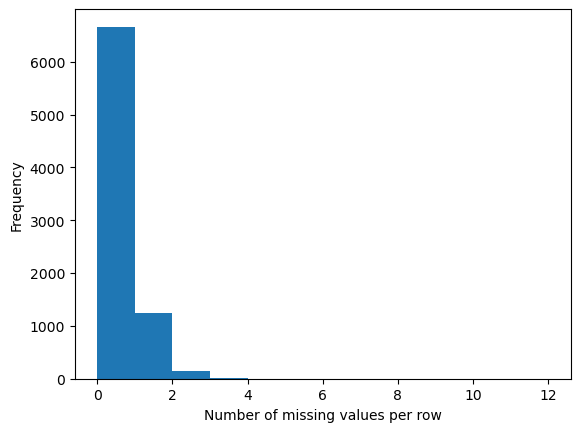

Total number of rows with missing values: 1582


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [38]:
#Plot missing data frequency horizontally
plot_missing_values(df_train)

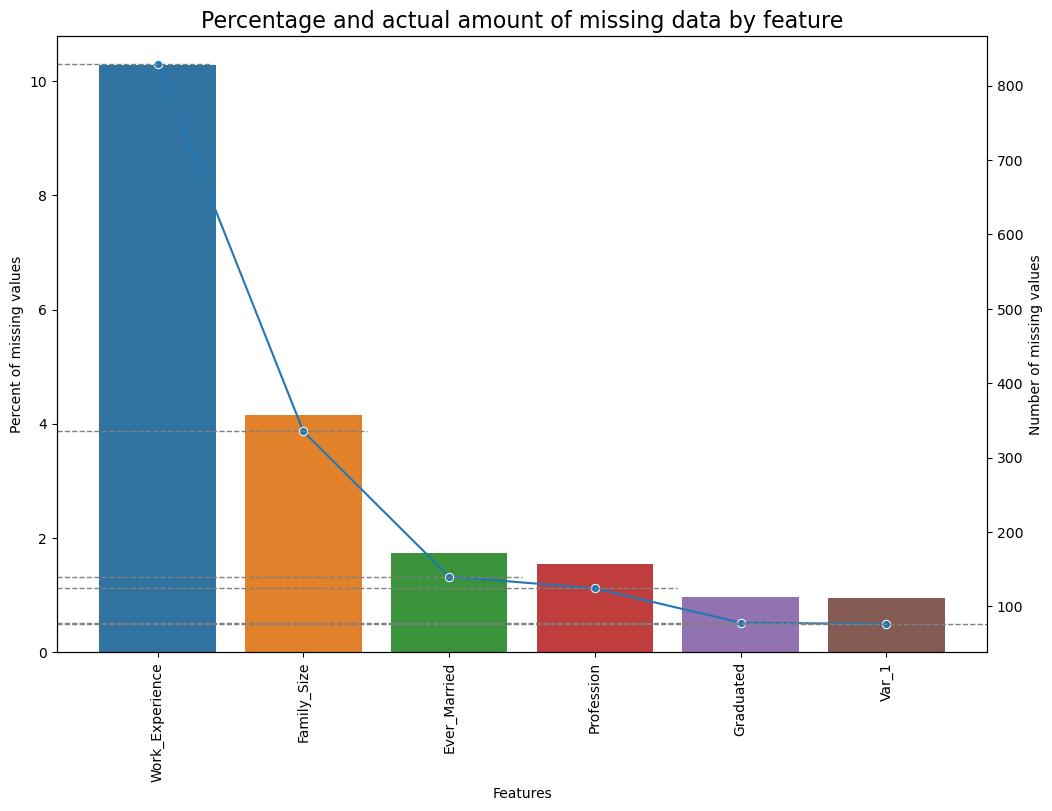

In [39]:
#Plot missing data frequency per column
plot_missing_data_detailed(df_train)

In [40]:
#Check the count of each category
df_train['Var_1'].value_counts().sort_values(ascending=True)

Cat_5      85
Cat_1     133
Cat_7     203
Cat_2     422
Cat_3     822
Cat_4    1089
Cat_6    5238
Name: Var_1, dtype: int64

In [41]:
#Check how many null values does 'Var_1' contains
df_train['Var_1'].isnull().sum()

76

In [42]:
#Check how many rows have missing values in at least 2 columns
row_missing_values = df_train.isnull().sum(axis=1)
row_missing_values_sorted = row_missing_values.sort_values(ascending=False)
rows_more_than_two_na = (row_missing_values_sorted >= 2).sum()
print(rows_more_than_two_na)

159


In [43]:
#Check how many rows have missing values in more than 3 columns
rows_more_than_three_na = (row_missing_values_sorted > 2).sum()
print(rows_more_than_three_na)

19


### We need to treat the missing values but that will take place in data_cleaning.py. Let's move forward with the exploration of the distributions.

In [44]:
# Split columns into categorical and numerical
cat_cols = df_train.select_dtypes(include='object').columns
num_cols = df_train.select_dtypes(include='number').columns

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Work_Experience'}>,
        <AxesSubplot:title={'center':'Family_Size'}>],
       [<AxesSubplot:title={'center':'num_missing'}>, <AxesSubplot:>]],
      dtype=object)

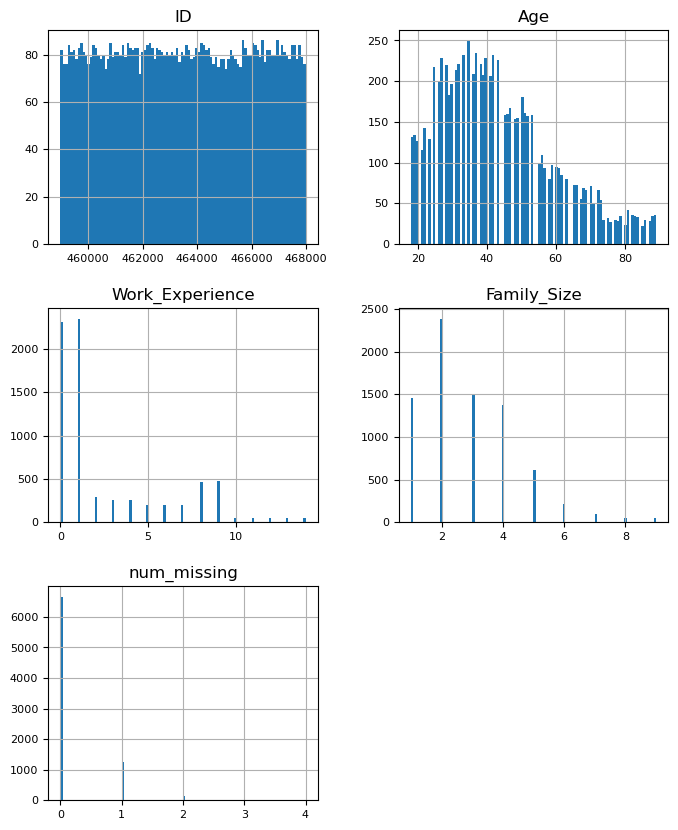

In [45]:
#Plot the distribution of the numerical columns
df_train.hist(figsize=(8, 10), bins=100, xlabelsize=8, ylabelsize=8)

### It concluded that 'Age', 'Work_Experience' and 'Family_Size' are positively skewed (tail is more pronounced on the right side than it is on the left). Let's explore the distributions of the numerical variables one by one(also in combination with 'Segmentation variable)

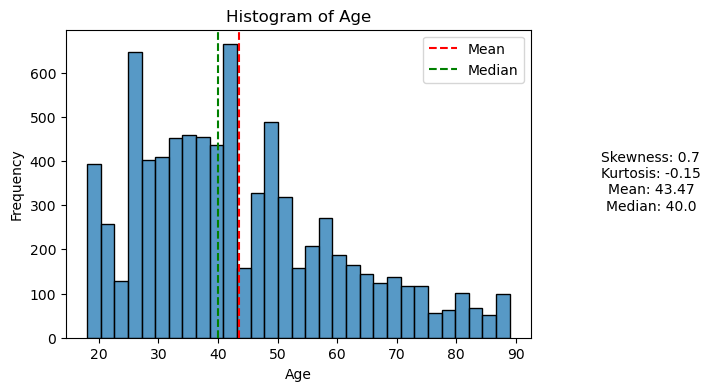

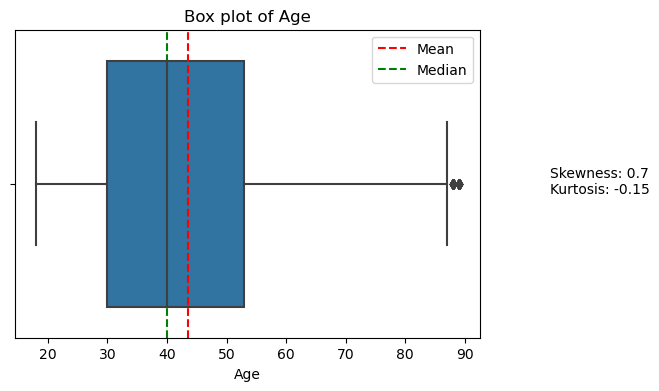

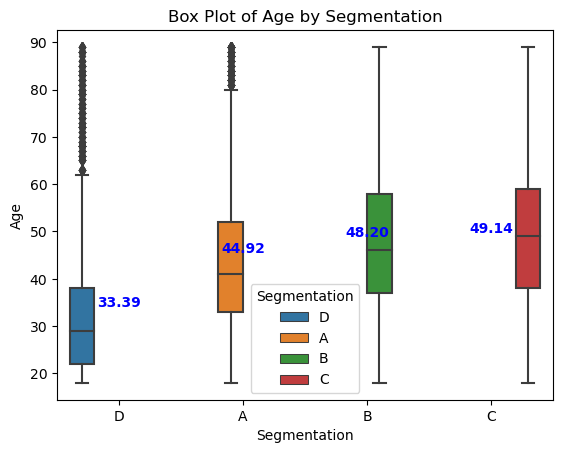

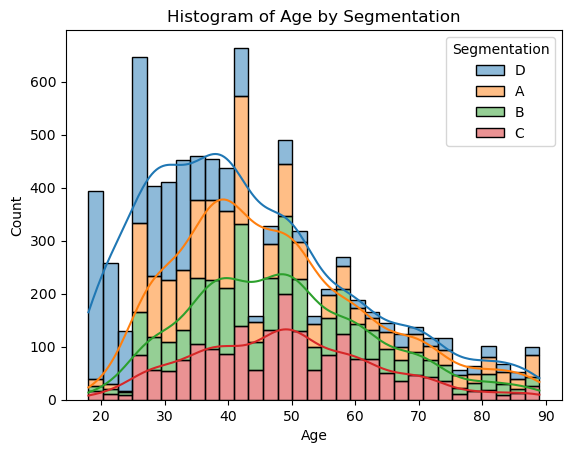

In [46]:
#Plot histogram of 'Work_Experience' column
plot_histogram(df_train, 'Age')

#Plot distribution plot of 'Work_Experience' column
plot_boxplot(df_train, 'Age')

#Plot a box plot in pair with 'Segmentation'
plot_boxplot_grouped(df_train, 'Age', 'Segmentation')
plot_histogram_grouped(df_train, 'Age', 'Segmentation')

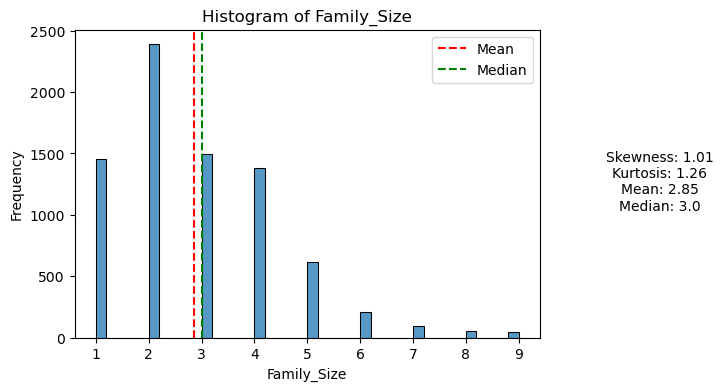

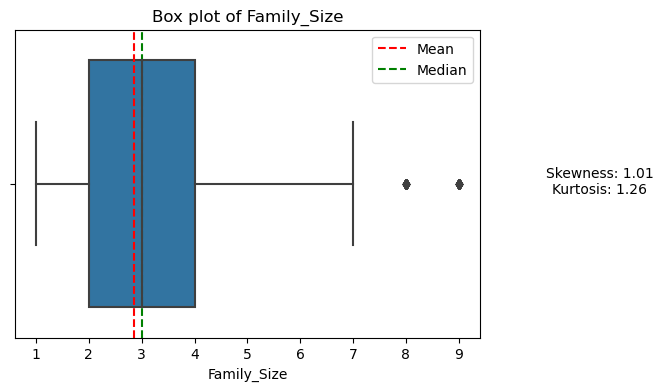

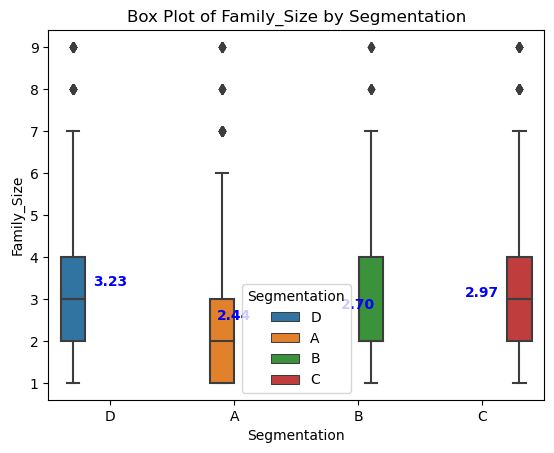

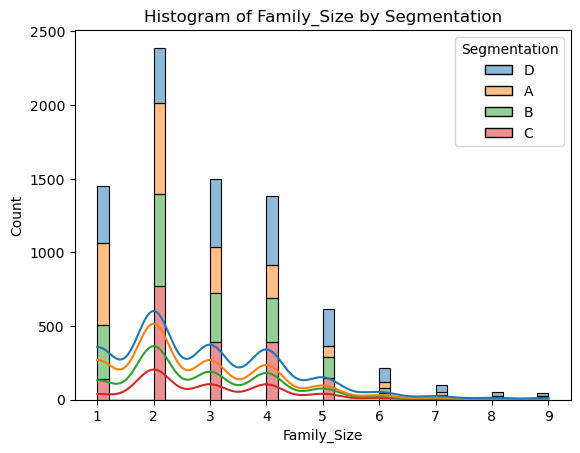

In [47]:
#Plot histogram of 'Family_Size' column
plot_histogram(df_train, 'Family_Size')

#Plot distribution plot of 'Family_Size' column
plot_boxplot(df_train, 'Family_Size')

#Plot a box plot in pair with 'Segmentation'
plot_boxplot_grouped(df_train, 'Family_Size', 'Segmentation')
plot_histogram_grouped(df_train, 'Family_Size', 'Segmentation')

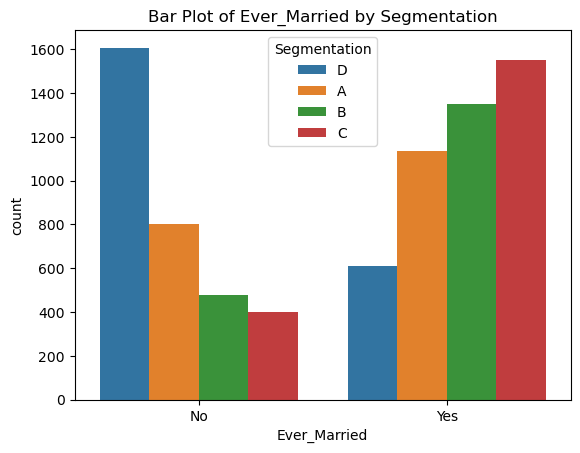

In [48]:
#Plot barplot for 'Ever_Married'
plot_barplot_grouped(df_train, 'Ever_Married', 'Segmentation')

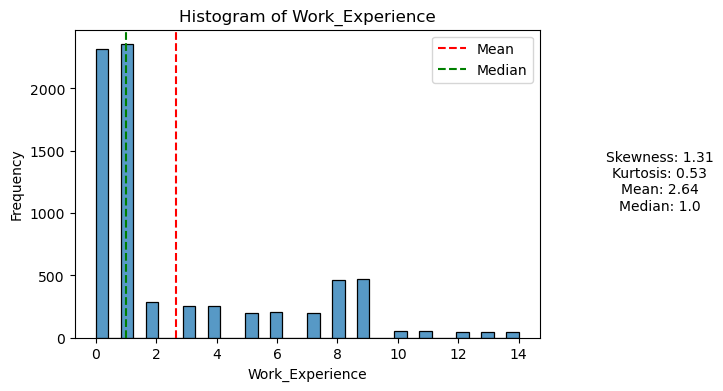

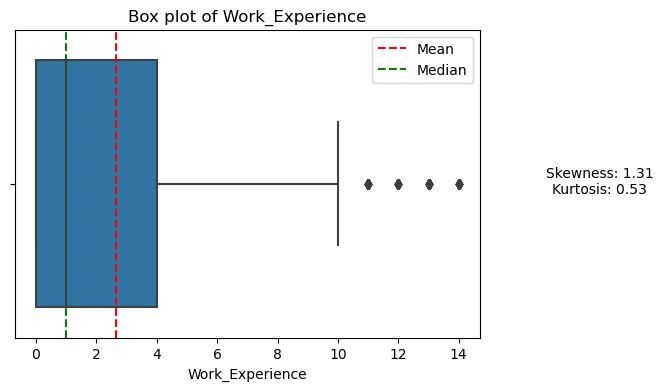

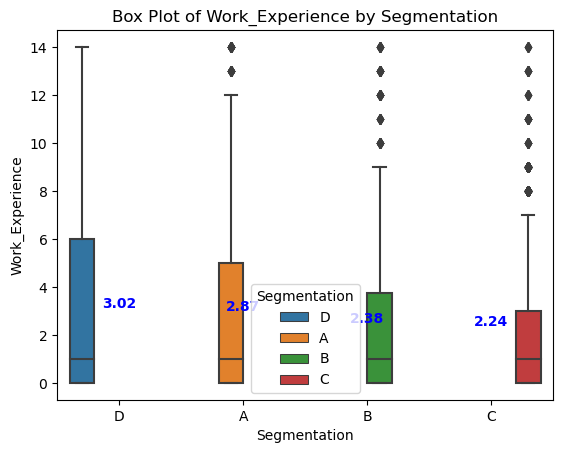

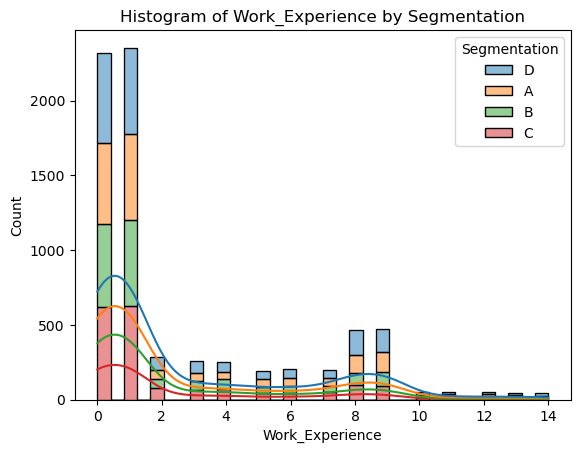

In [49]:
#Plot histogram of 'Age' column
plot_histogram(df_train, 'Work_Experience')

#Plot distribution plot 
plot_boxplot(df_train, 'Work_Experience')

#Plot a box plot in pair with 'Segmentation'
plot_boxplot_grouped(df_train, 'Work_Experience', 'Segmentation')
plot_histogram_grouped(df_train, 'Work_Experience', 'Segmentation')


* As illustrated from the graphs, segment D yields meaningful insights. The mean age of customers of this segment is 33.
* Their family members (including themselves) are on average 3, which may infer that an average customer in segment D has a child. 
* However, most people in the D segment are not married and are more experienced than any other segment.


### Moving on to the categorical columns.

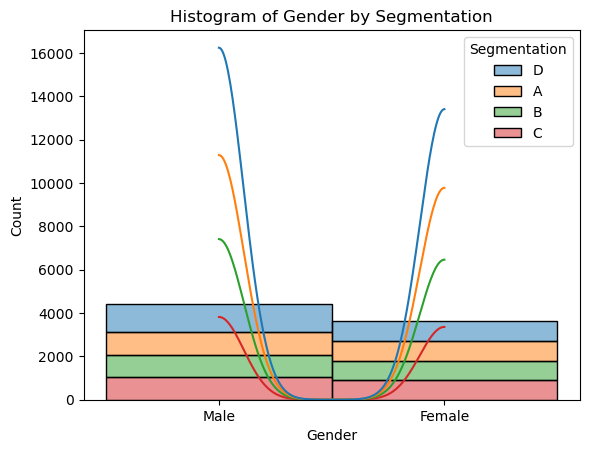

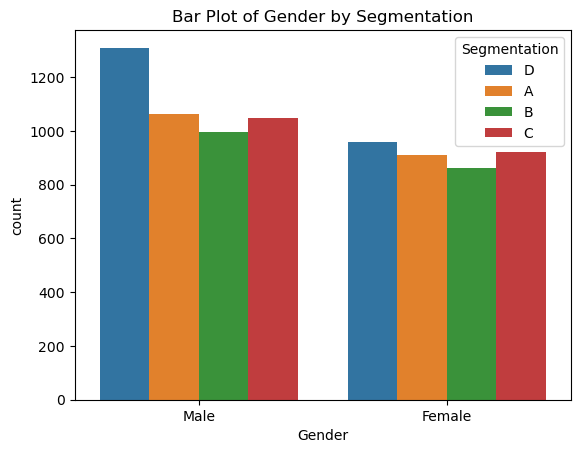

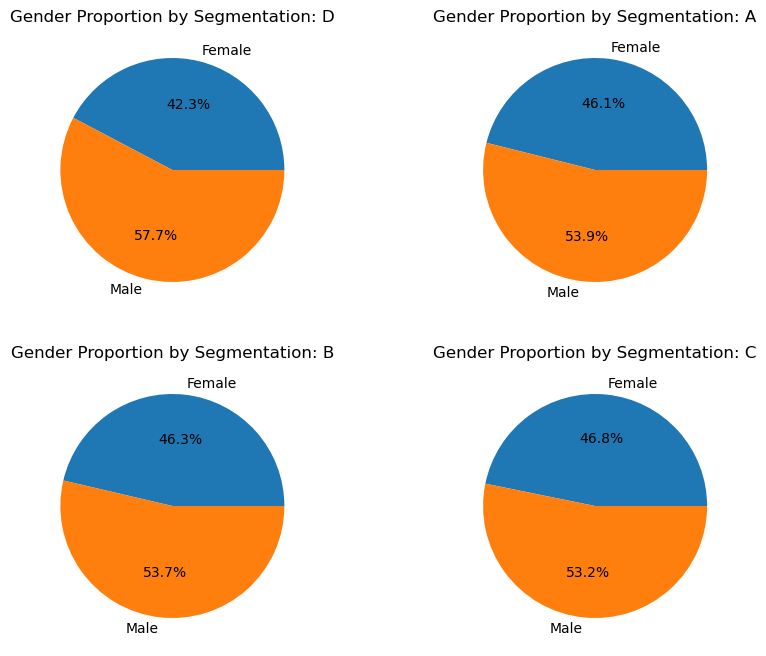

In [50]:
plot_histogram_grouped(df_train, 'Gender', 'Segmentation')
plot_barplot_grouped(df_train, 'Gender', 'Segmentation')
plot_piechart_grouped(df_train, 'Gender', 'Segmentation')


#plot_barplot_grouped(df_train, 'Spending_Score', 'Segmentation')

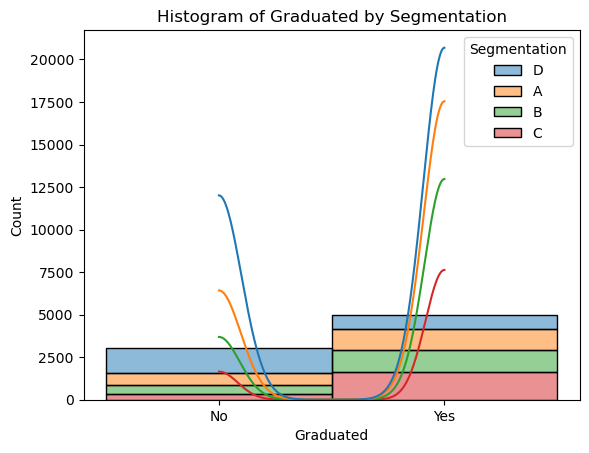

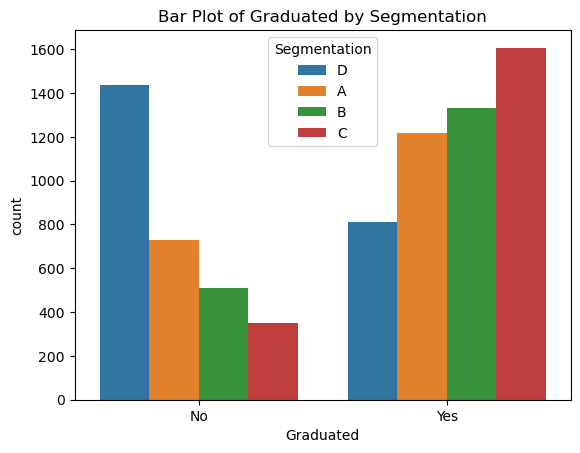

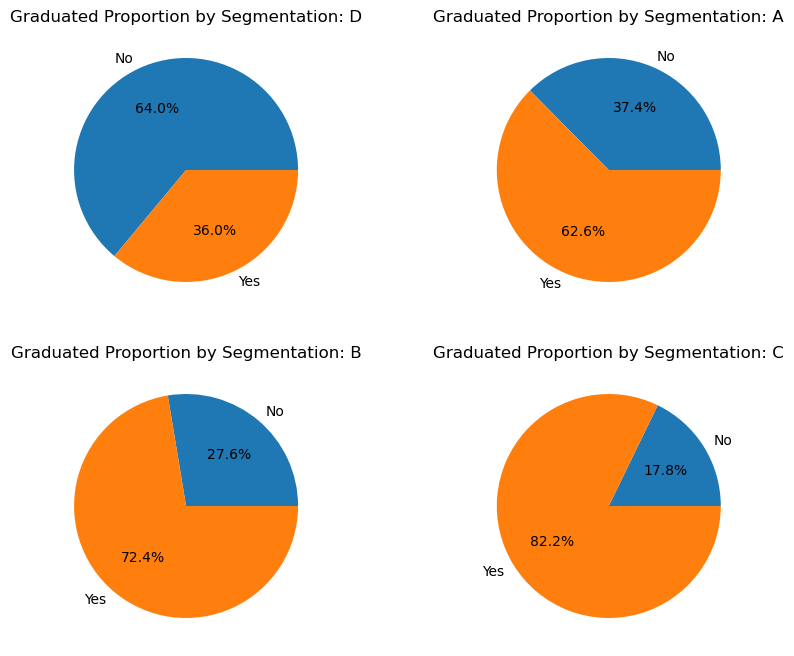

In [51]:
# Plot 'Graduated' with 'Segmentation' 
plot_histogram_grouped(df_train, 'Graduated', 'Segmentation')
plot_barplot_grouped(df_train, 'Graduated', 'Segmentation')
plot_piechart_grouped(df_train, 'Graduated', 'Segmentation')

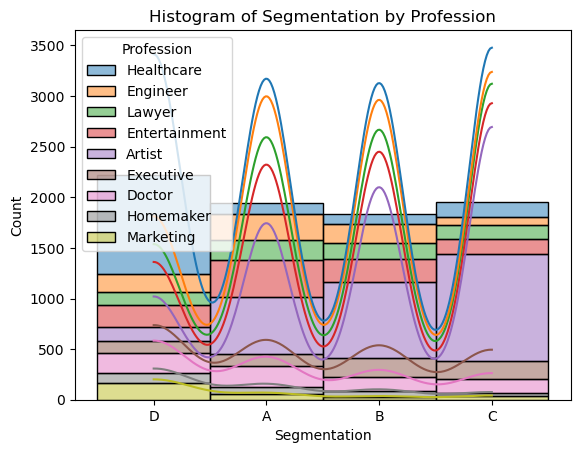

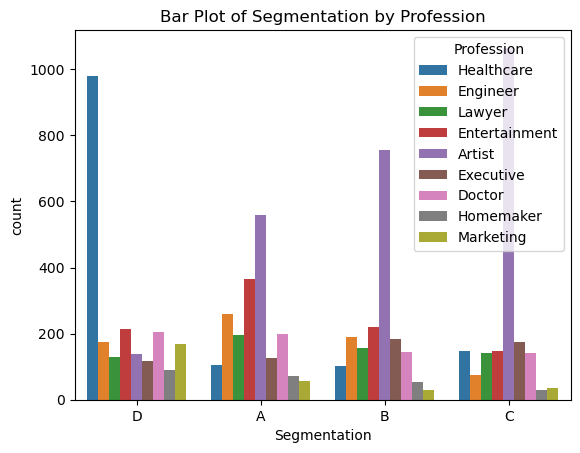

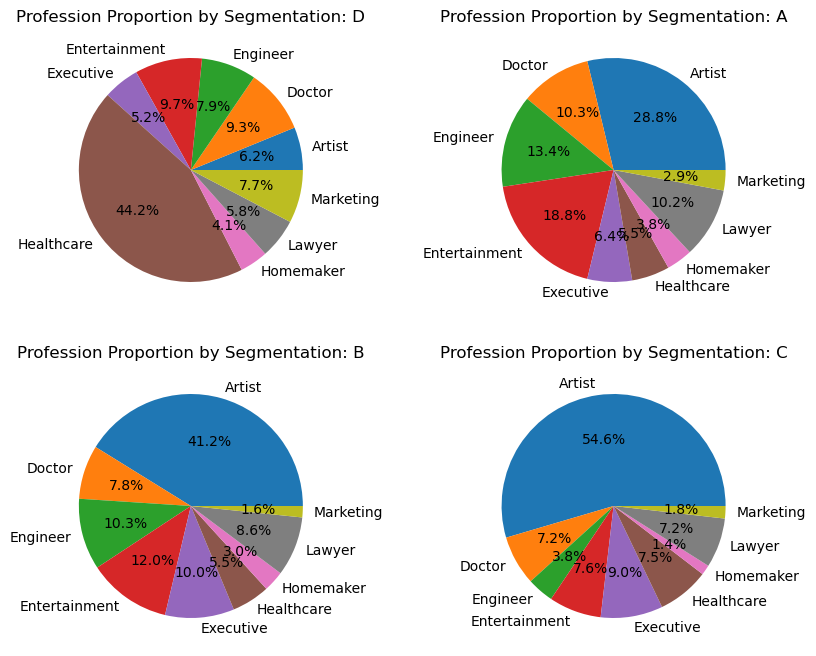

In [52]:
# Plot 'Graduated' with 'Segmentation' 
plot_histogram_grouped(df_train, 'Segmentation', 'Profession')
plot_barplot_grouped(df_train, 'Segmentation', 'Profession')
plot_piechart_grouped(df_train, 'Profession', 'Segmentation')

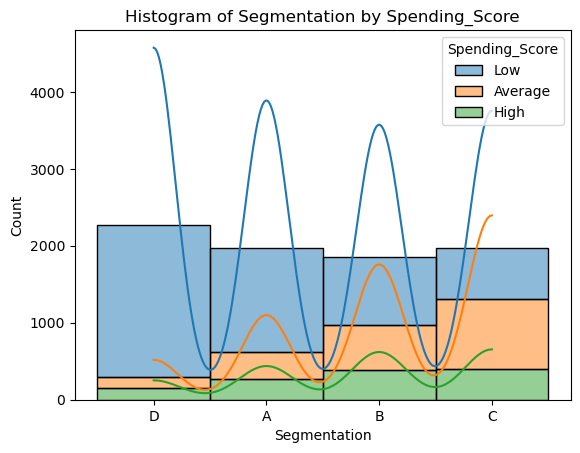

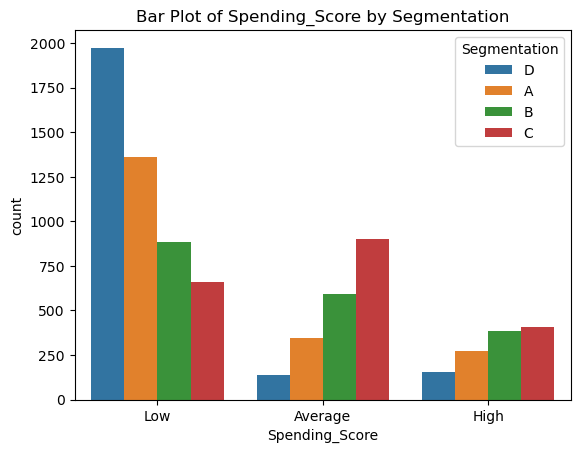

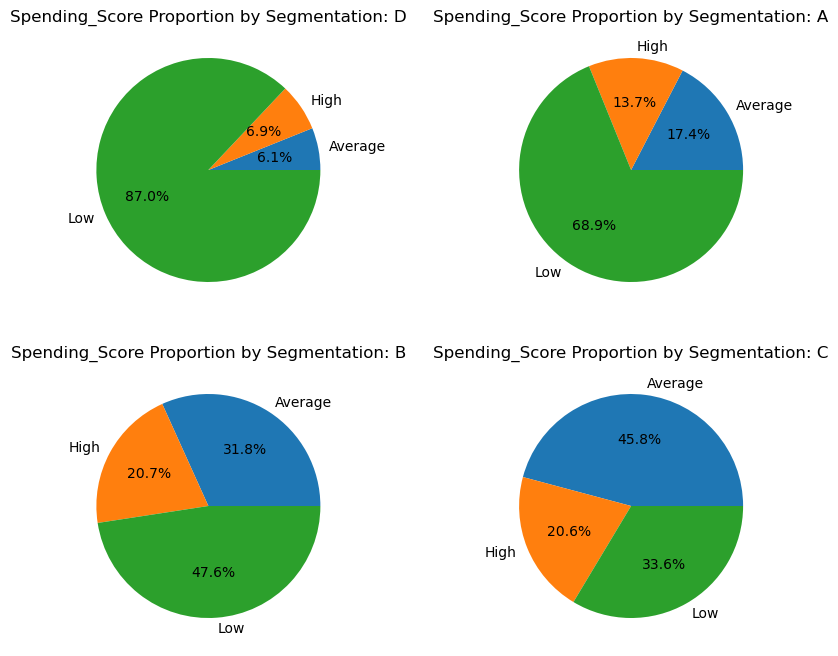

In [53]:
# Plot 'Graduated' with 'Segmentation' 
plot_histogram_grouped(df_train, 'Segmentation', 'Spending_Score')
plot_barplot_grouped(df_train, 'Spending_Score', 'Segmentation')
plot_piechart_grouped(df_train, 'Spending_Score', 'Segmentation')

* It can be inferred that segment D has the highest male percentage compared to other segments by 4%. 

* Contrariwise, segment D also contain the highest percentage of people that did not graduate while segment C has the most number of customers who did graduate. 

* Altough segment D contain customers that are mostly working in healthcare, the other segments have the highest number of arists as customers. Common to all four segments is that a very small percentage work as a homemaker. 

* Concerning spending, the majority of customers in segment D are low spending while in segment C average spending people are more (almost half). The highest percentage, by a slight amount, of high spenders can be found in segment B.

### Moving on to feature to feature relationship

Starting off with numerical variables (Spearman's coefficient is chosen to measure the monotonic relationship and try not to violate the assumption that the underlying population is normal) :

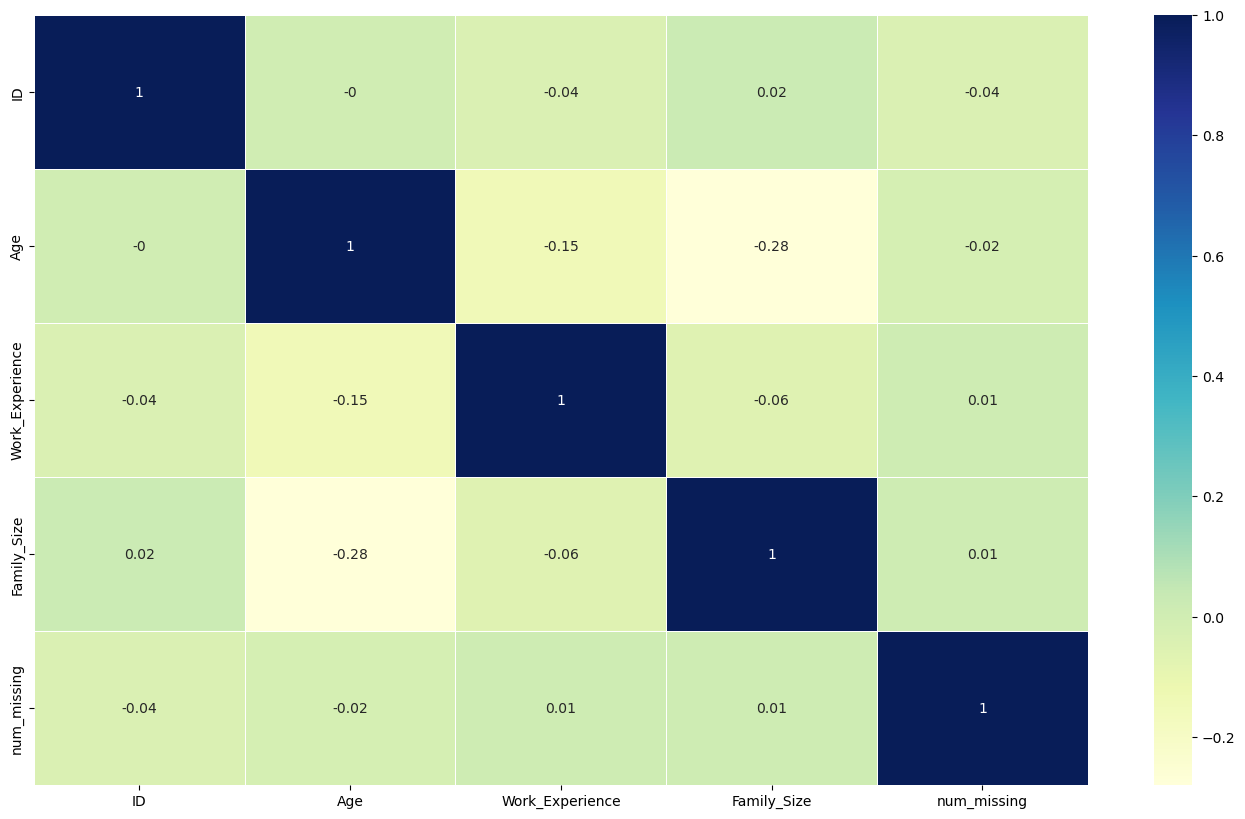

In [54]:
# Correlation matrix for numerical variables
plt.figure(figsize=(17,10))
sns.heatmap(df_train.corr(method='spearman').round(2),linewidth = 0.5,annot=True,cmap="YlGnBu")
plt.show()

### Moving on to categorical data relationships

In [58]:
# Turn booleans to binary and 'Spending_Score' to (numerical) nominal
df_train['Gender'] = df_train['Gender'].replace(('Male','Female'),(1,0))
df_train['Ever_Married'] = df_train['Ever_Married'].replace(('Yes','No'),(1,0))
df_train['Graduated'] = df_train['Graduated'].replace(('Yes','No'),(1,0))
df_train['Spending_Score'] = df_train['Spending_Score'].replace(('High','Average','Low'),(3,2,1))

# converting nominal variables to dummies
profession = pd.get_dummies(df_train.Profession,prefix='Profession')
df_train = pd.concat([df_train,profession],axis=1)

varr = pd.get_dummies(df_train.Var_1,prefix='Var_1')
df_train = pd.concat([df_train,varr],axis=1)

df1 = df_train.copy()
df1
df1.drop(['ID', 'Var_1'], axis=1, inplace=True)

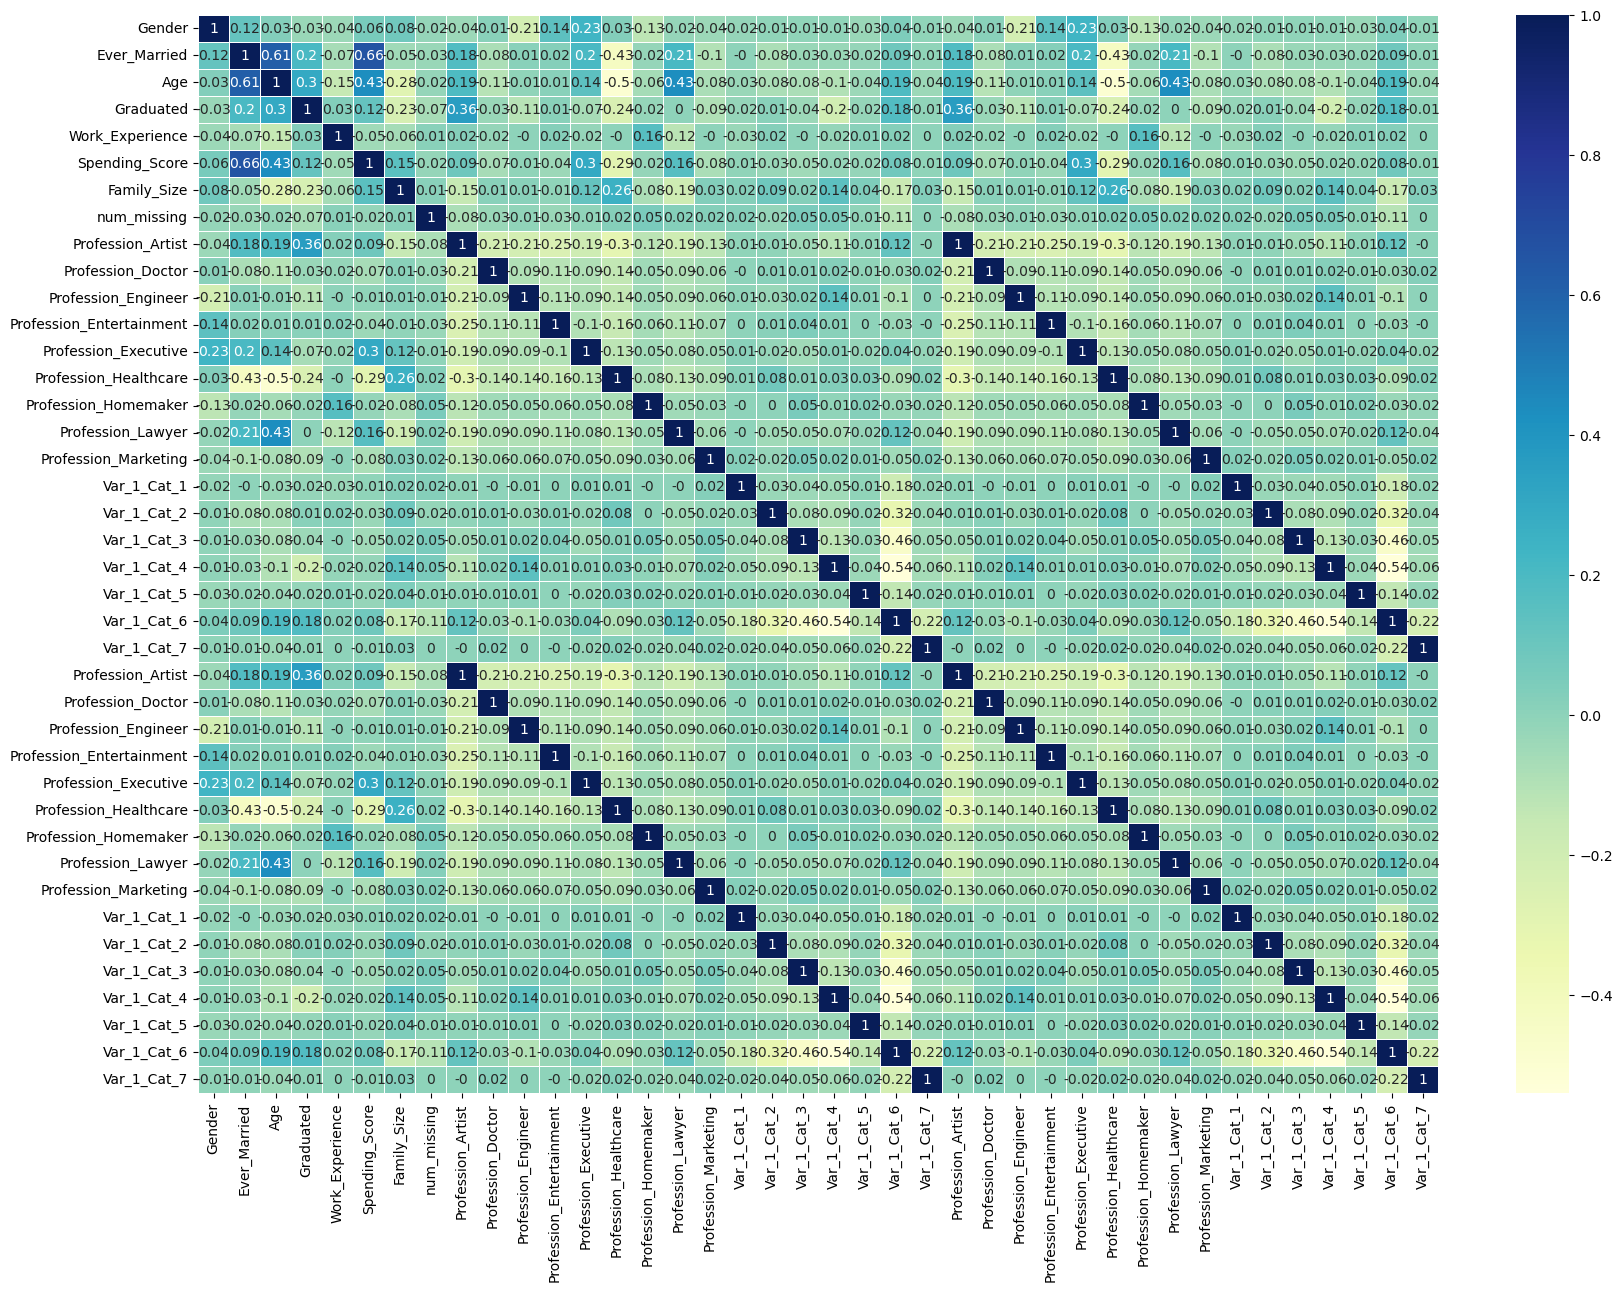

In [59]:
# Correlation matrix
plt.figure(figsize=(20,14))
sns.heatmap(df1.corr(method='spearman').round(2),linewidth = 0.5,annot=True,cmap="YlGnBu")
plt.show()

Now, that's quite different from before. Let's gather some insights below:

* 'Age' and 'Ever_Married' has a relatively high correlation (0.6) and can be interpreted as: people who are married are older compared to unmarried. It makes sense, right?

* 'Age' is also positively correlated with 'Spending_Score' and 'Profession_Lawyer' (0.43) and can be interpreted as: As 'Age' increases the 'Spending_Score' and 'Professsion_Lawyer' also increase. It is a bit strange that 'Profession_Doctor' is not positively correlated with 'Age' because Doctors may study for an extensive period of time as well. Surprisingly, 'Age' is negatively correlated with 'Profession_Healthcare' which means that healthcare workers are younger in age to those of other professions.

* 'Ever_Married' is highly positively correlated with 'Spending_Score' as well meaning that married people tends to spend more. Additionally, 'Ever_Married' is negatively correlated with 'Profession_Healthcare' implying that unmarried people tend to work in the healthcare sector.  